# 1. Kết nối tới drive , import một số thư viện cần thiết

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import neighbors
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [55]:
CMG = pd.read_csv("/content/drive/MyDrive/DAB Final Project/Source Code/Dataset/CMG.csv")

In [56]:
CMG

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,19753,19621,19951,19026,432.09K,1.01%
1,12/4/2017,20612,20348,20744,20149,476.28K,4.35%
2,12/5/2017,21008,20612,21801,20017,923.95K,1.92%
3,12/6/2017,22065,21008,22462,20876,747.13K,5.03%
4,12/7/2017,23585,22462,23585,22462,808.92K,6.89%
...,...,...,...,...,...,...,...
1371,6/5/2023,44050,41200,44050,41200,207.10K,6.92%
1372,6/6/2023,45700,46500,46500,43950,50.20K,3.75%
1373,6/7/2023,45500,44200,46000,43600,24.40K,-0.44%
1374,6/8/2023,44500,44100,44900,43600,25.00K,-2.20%


In [57]:
CMG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1376 non-null   object
 1   Price     1376 non-null   int64 
 2   Open      1376 non-null   int64 
 3   High      1376 non-null   int64 
 4   Low       1376 non-null   int64 
 5   Vol.      1376 non-null   object
 6   Change %  1376 non-null   object
dtypes: int64(4), object(3)
memory usage: 75.4+ KB


# 2. Tiền xử lý dữ liệu

<h1>Loại bỏ một số dữ liệu trống trong dataset

In [58]:
CMG = CMG.reset_index(drop=True) # Reset the index

In [59]:
# Drop missing values
CMG = CMG.dropna()

In [60]:
CMG = CMG.reset_index()['Price'].astype(float)

In [61]:
# CMG['Index'] = np.arange(len(CMG.index))

In [62]:
CMG.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1376 entries, 0 to 1375
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
1376 non-null   float64
dtypes: float64(1)
memory usage: 10.9 KB


# 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 7:2:1

In [63]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(CMG))
test_size = int(0.2 * len(CMG))
val_size = len(CMG) - train_size - test_size

In [64]:
train_data = CMG[:train_size]
test_data = CMG[train_size:train_size+test_size]
val_data = CMG[train_size+test_size:]

In [65]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
x_test = np.array(test_data.index).reshape(-1,1)
y_test = np.array(test_data)
x_val = np.array(val_data.index).reshape(-1,1)
y_val = np.array(val_data)

<h1>Finding the best value for K

In [66]:
from math import sqrt

In [67]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5694.399842269277
RMSE value for k=  2 is: 5690.526324515159
RMSE value for k=  3 is: 5682.60046265632
RMSE value for k=  4 is: 5679.223079768281
RMSE value for k=  5 is: 5704.858746398866
RMSE value for k=  6 is: 5729.462589029699
RMSE value for k=  7 is: 5787.481547793327
RMSE value for k=  8 is: 5840.383467718537
RMSE value for k=  9 is: 5863.9986682994895
RMSE value for k=  10 is: 5881.738255358314
RMSE value for k=  11 is: 5894.753261717486
RMSE value for k=  12 is: 5939.24351013892
RMSE value for k=  13 is: 5919.0671933668045
RMSE value for k=  14 is: 5870.9891133214005
RMSE value for k=  15 is: 5812.108476501989
RMSE value for k=  16 is: 5792.510498970357
RMSE value for k=  17 is: 5766.394081545277
RMSE value for k=  18 is: 5765.367406271082
RMSE value for k=  19 is: 5764.453174897905
RMSE value for k=  20 is: 5757.793674269212


<Axes: >

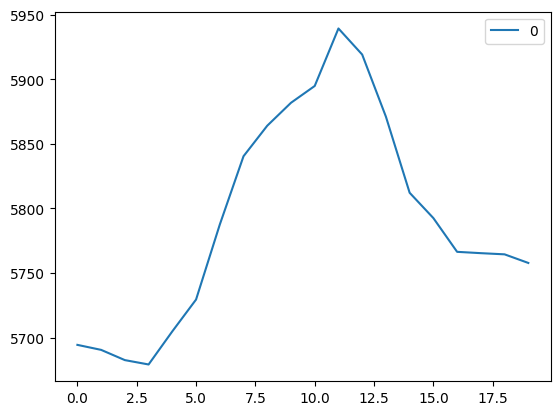

In [68]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<h1>K-Nearest Neighbor

In [69]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 4)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [70]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [71]:
import sys

In [72]:
#  Create index for next 30 days
last_index =  CMG.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# print(x_next_30_days)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[49518.25 49518.25 49518.25 49518.25 49518.25 49518.25 49518.25 49518.25
 49518.25 49518.25 49518.25 49518.25 49518.25 49518.25 49518.25 49518.25
 49518.25 49518.25 49518.25 49518.25 49518.25 49518.25 49518.25 49518.25
 49518.25 49518.25 49518.25 49518.25 49518.25 49518.25]


<h1> Vẽ hình mô tả dự đoán

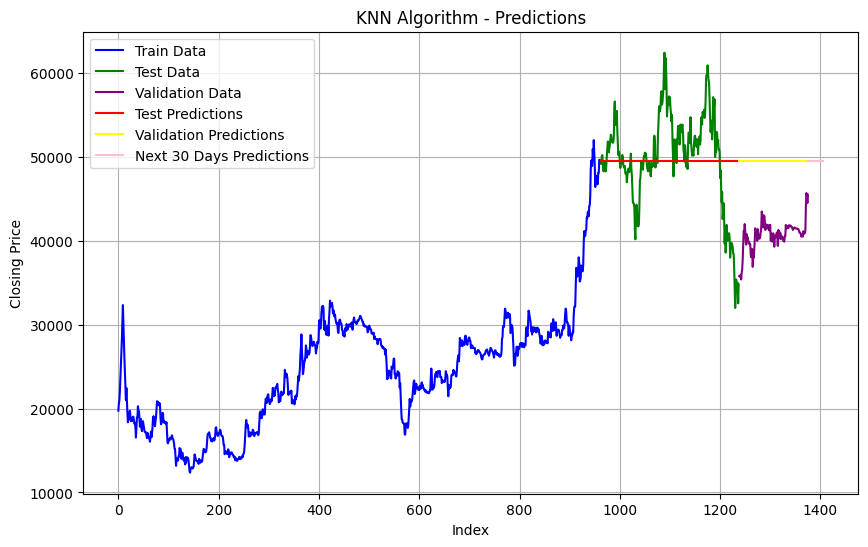

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='green', label='Test Data')
plt.plot(x_val, y_val, color='purple', label='Validation Data')
plt.plot(x_test, y_pred, color='red', label='Test Predictions')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(x_next_30_days, y_next_30_days, color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.title('KNN Algorithm - Predictions')
plt.legend()
plt.grid(True)
plt.show()

<h1>Đánh giá độ chính xác của thuật toán

In [74]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 8947.923829154732
Testing RMSE: 5679.223079768281


In [75]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 8783.105072463768
Testing MAE: 4173.486363636363


In [76]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 21.783693798623656
Testing MAPE: 8.928416560773764


# 5. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1

In [77]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(CMG))
test_size = int(0.3 * len(CMG))
val_size = len(CMG) - train_size - test_size

In [78]:
train_data = CMG[:train_size]
test_data = CMG[train_size:train_size+test_size]
val_data = CMG[train_size+test_size:]

In [79]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
x_test = np.array(test_data.index).reshape(-1,1)
y_test = np.array(test_data)
x_val = np.array(val_data.index).reshape(-1,1)
y_val = np.array(val_data)

<h1>Finding the best value for K

In [80]:
from math import sqrt

In [81]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 18208.223788618365
RMSE value for k=  2 is: 18225.17138685113
RMSE value for k=  3 is: 17945.497323340995
RMSE value for k=  4 is: 17721.397515943332
RMSE value for k=  5 is: 17526.753924234792
RMSE value for k=  6 is: 17341.448417694835
RMSE value for k=  7 is: 17185.65257754845
RMSE value for k=  8 is: 17236.56533750127
RMSE value for k=  9 is: 17406.888199674482
RMSE value for k=  10 is: 17513.33010946261
RMSE value for k=  11 is: 17548.335448806836
RMSE value for k=  12 is: 17594.441548549923
RMSE value for k=  13 is: 17756.136327985263
RMSE value for k=  14 is: 17895.229022134816
RMSE value for k=  15 is: 18011.583090703076
RMSE value for k=  16 is: 18130.76785326615
RMSE value for k=  17 is: 18213.955371518456
RMSE value for k=  18 is: 18288.025418180132
RMSE value for k=  19 is: 18352.608435362177
RMSE value for k=  20 is: 18429.743414246863


<Axes: >

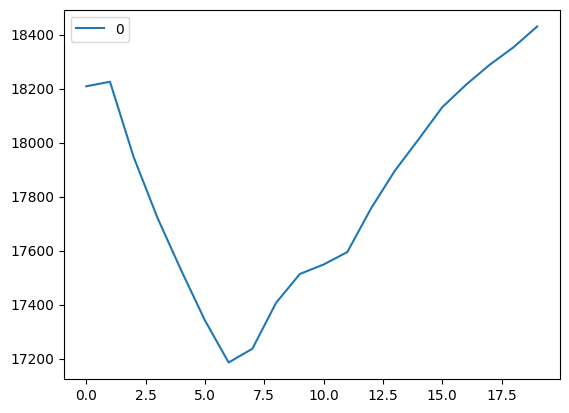

In [82]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<h1>K-Nearest Neighbor

In [83]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 7)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [84]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [85]:
import sys

In [86]:
#  Create index for next 30 days
last_index =  CMG.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# print(x_next_30_days)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[30547.42857143 30547.42857143 30547.42857143 30547.42857143
 30547.42857143 30547.42857143 30547.42857143 30547.42857143
 30547.42857143 30547.42857143 30547.42857143 30547.42857143
 30547.42857143 30547.42857143 30547.42857143 30547.42857143
 30547.42857143 30547.42857143 30547.42857143 30547.42857143
 30547.42857143 30547.42857143 30547.42857143 30547.42857143
 30547.42857143 30547.42857143 30547.42857143 30547.42857143
 30547.42857143 30547.42857143]


<h1> Vẽ hình mô tả dự đoán

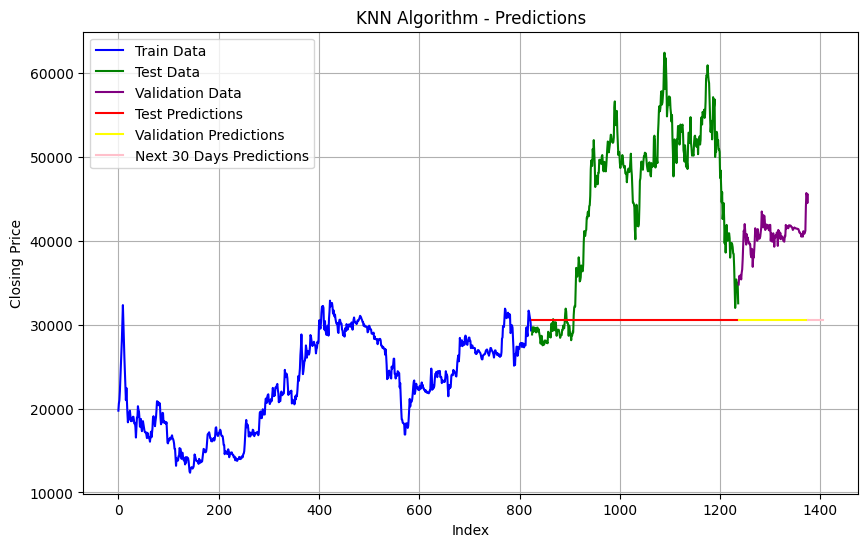

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='green', label='Test Data')
plt.plot(x_val, y_val, color='purple', label='Validation Data')
plt.plot(x_test, y_pred, color='red', label='Test Predictions')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(x_next_30_days, y_next_30_days, color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.title('KNN Algorithm - Predictions')
plt.legend()
plt.grid(True)
plt.show()

<h1>Đánh giá độ chính xác của thuật toán

In [88]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 10299.240846194847
Testing RMSE: 17185.65257754845


In [89]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 10145.017471736897
Testing MAE: 14775.811026352287


In [90]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 24.781548023730306
Testing MAPE: 29.78165147284856


# 6. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [91]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(CMG))
test_size = int(0.3 * len(CMG))
val_size = len(CMG) - train_size - test_size

In [92]:
train_data = CMG[:train_size]
test_data = CMG[train_size:train_size+test_size]
val_data = CMG[train_size+test_size:]

In [93]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
x_test = np.array(test_data.index).reshape(-1,1)
y_test = np.array(test_data)
x_val = np.array(val_data.index).reshape(-1,1)
y_val = np.array(val_data)

<h1>Finding the best value for K

In [94]:
from math import sqrt

In [95]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 14738.89740165474
RMSE value for k=  2 is: 14765.865697401196
RMSE value for k=  3 is: 14614.474287448378
RMSE value for k=  4 is: 14565.83823982131
RMSE value for k=  5 is: 14600.25648357636
RMSE value for k=  6 is: 14596.704619434944
RMSE value for k=  7 is: 14530.004488689994
RMSE value for k=  8 is: 14635.48245186703
RMSE value for k=  9 is: 14789.770677141292
RMSE value for k=  10 is: 14865.687954618099
RMSE value for k=  11 is: 14947.886822596867
RMSE value for k=  12 is: 15044.17502271486
RMSE value for k=  13 is: 15181.41870802106
RMSE value for k=  14 is: 15336.002759154335
RMSE value for k=  15 is: 15467.490464585351
RMSE value for k=  16 is: 15572.76701613054
RMSE value for k=  17 is: 15659.462380162591
RMSE value for k=  18 is: 15730.536010220825
RMSE value for k=  19 is: 15794.370230517568
RMSE value for k=  20 is: 15846.259086889715


<Axes: >

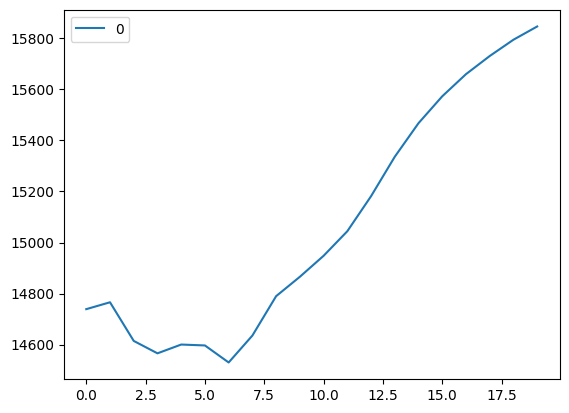

In [96]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<h1>K-Nearest Neighbor

In [97]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 7)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [98]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [99]:
import sys

In [100]:
#  Create index for next 30 days
last_index =  CMG.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# print(x_next_30_days)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[27831.85714286 27831.85714286 27831.85714286 27831.85714286
 27831.85714286 27831.85714286 27831.85714286 27831.85714286
 27831.85714286 27831.85714286 27831.85714286 27831.85714286
 27831.85714286 27831.85714286 27831.85714286 27831.85714286
 27831.85714286 27831.85714286 27831.85714286 27831.85714286
 27831.85714286 27831.85714286 27831.85714286 27831.85714286
 27831.85714286 27831.85714286 27831.85714286 27831.85714286
 27831.85714286 27831.85714286]


<h1> Vẽ hình mô tả dự đoán

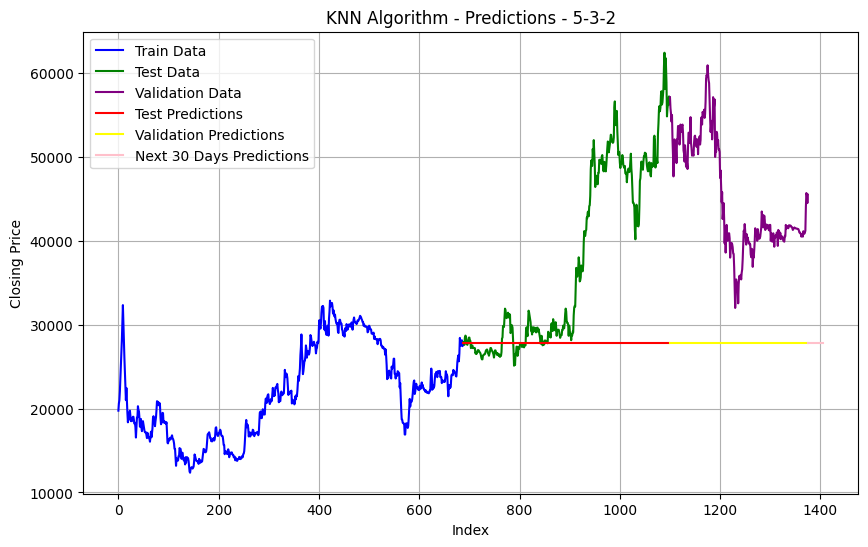

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='green', label='Test Data')
plt.plot(x_val, y_val, color='purple', label='Validation Data')
plt.plot(x_test, y_pred, color='red', label='Test Predictions')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(x_next_30_days, y_next_30_days, color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.title('KNN Algorithm - Predictions - 5-3-2')
plt.legend()
plt.grid(True)
plt.show()

<h1>Đánh giá độ chính xác của thuật toán

In [102]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 18386.58385851615
Testing RMSE: 14530.004488689994


In [103]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 17188.853002070395
Testing MAE: 10176.979889042996


In [104]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 36.92157564757181
Testing MAPE: 21.61828272396545
